In [9]:
# Cédula 1 - Importação e dados
from math import sqrt

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv("../data/cancer_example.csv")
df.head()

,year,cases,population
0,2014,1200,1000000
1,2015,1300,1005000
2,2016,1420,1010000
3,2017,1500,1015000
4,2018,1690,1020000


             year        cases    population
count    10.00000    10.000000  1.000000e+01
mean   2018.50000  1680.000000  1.021800e+06
std       3.02765   323.109888  1.454342e+04
min    2014.00000  1200.000000  1.000000e+06
25%    2016.25000  1440.000000  1.011250e+06
50%    2018.50000  1720.000000  1.022000e+06
75%    2020.75000  1875.000000  1.031750e+06
max    2023.00000  2190.000000  1.044000e+06


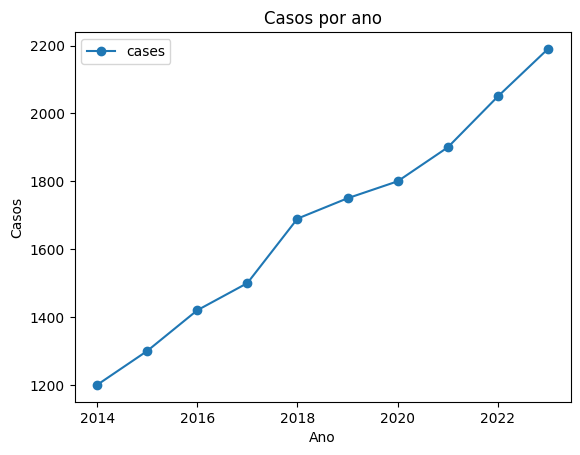

In [10]:
# Cédula 2 - Análise exploratória
print(df.describe(include="all"))
df.plot(x="year", y="cases", kind="line", marker="o", title="Casos por ano")
plt.xlabel("Ano")
plt.ylabel("Casos")
plt.show()

In [11]:
# Cédula 3 - Modelo simples
X = df[["year"]]
y = df["cases"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("Coeficiente:", model.coef_[0])
print("Intercepto:", model.intercept_)
print("RMSE:", rmse)
print("R²:", r2)

Coeficiente: 105.61881188118815
Intercepto: -211512.59900990102
RMSE: 11.837248577127738
R²: 0.9985250478539294


In [12]:
# Cédula 4 - Previsão futura
import numpy as np

anos_futuros = pd.DataFrame({"year": np.arange(2024, 2028)})
previsoes = model.predict(anos_futuros)
pd.DataFrame({"year": anos_futuros["year"], "predicted_cases": previsoes})

,year,predicted_cases
0,2024,2259.876238
1,2025,2365.495050
2,2026,2471.113861
3,2027,2576.732673
